In [302]:
#importing libraries
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import hvplot.pandas
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [303]:
#reading in the csv file
staten_island_df = pd.read_csv("Resources/staten_island.csv").set_index("OBJECTID")
queens_df = pd.read_csv("Resources/queens.csv").set_index("OBJECTID")
brooklyn_df = pd.read_csv("Resources/brooklyn.csv").set_index("OBJECTID")
bronx_df = pd.read_csv("Resources/bronx.csv").set_index("OBJECTID")
manhattan_df = pd.read_csv("Resources/manhattan.csv").set_index("OBJECTID")


<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 1 to 390
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Complaint ID  366 non-null    object 
 1   Offense       366 non-null    object 
 2   Latitude      390 non-null    float64
 3   Longitude     390 non-null    float64
 4   Borough       24 non-null     object 
 5   Public Area   24 non-null     object 
dtypes: float64(2), object(4)
memory usage: 21.3+ KB


**Cleaning Data**

- the data frame is stacked on top of each other by the longitude and latitude columns
- we are simply breaking up the data into crimes and public institutions

In [304]:
def dividedf(df1):
    x = df1.drop(columns=["facname", "Public Area", "Public Area (supergroup)"])
    x = x.dropna()
    y = df1[["facname", "Public Area", "Public Area (supergroup)", "Latitude", "Longitude"]]
    y = y.dropna().reset_index()
    return x, y


In [305]:
#dividing the df into crimes and public institutions
# r_crimes = staten_island_df.iloc[0:365, :]
r_crimes = staten_island_df.drop(columns= ["Borough", "Public Area"])
r_crimes = r_crimes.dropna()

In [306]:
#same method for public institutions and reordering columns
# r_public = staten_island_df.iloc[366:389, :]
r_public = staten_island_df[["Public Area", "Latitude", "Longitude"]]
r_public = r_public.dropna().reset_index()

In [307]:
r_public.head()


,OBJECTID,Public Area,Latitude,Longitude
0,367,PARKS,40.614533,-74.074185
1,368,RECREATION AND WATERFRONT SITES,40.510392,-74.230405
2,369,PUBLIC LIBRARIES,40.595802,-74.063027
3,370,PUBLIC LIBRARIES,40.590395,-74.101138
4,371,PARKS,40.638748,-74.083899


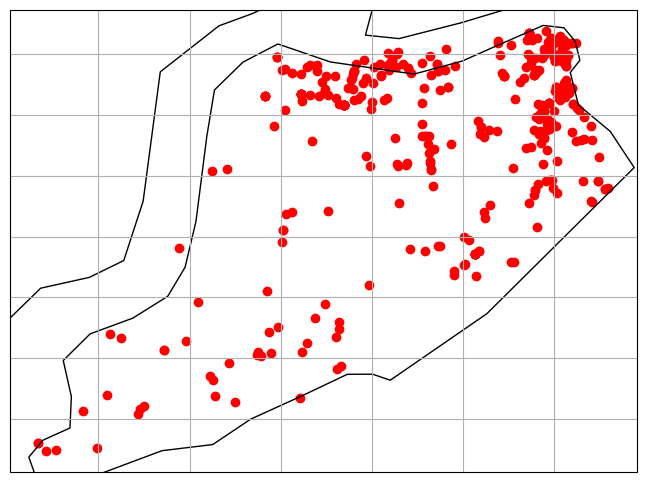

In [308]:
latitude_column = 'Latitude'
longitude_column = 'Longitude'

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection you want to use (e.g., PlateCarree, Mercator, etc.)
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features such as coastlines, rivers, etc.
ax.coastlines()

# Plot points from the DataFrame
ax.scatter(staten_island_df[longitude_column], staten_island_df[latitude_column], color='red', marker='o', transform=ccrs.PlateCarree())

# Add gridlines
ax.gridlines()

# Show the plot
plt.show()

In [309]:
df= dividedf(queens_df)
q_crimes = df[0]
q_public = df[1]


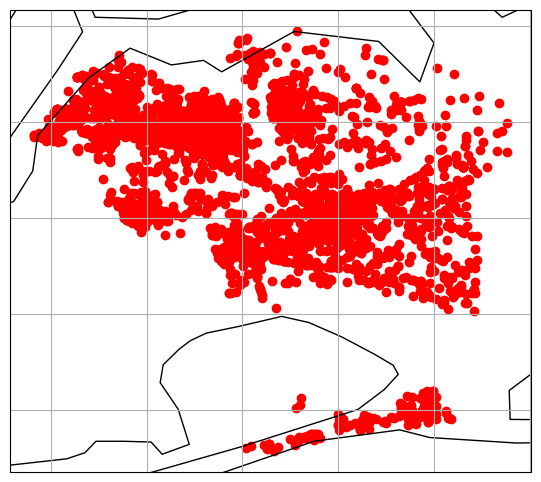

In [310]:
latitude_column = 'Latitude'
longitude_column = 'Longitude'

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection you want to use (e.g., PlateCarree, Mercator, etc.)
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features such as coastlines, rivers, etc.
ax.coastlines()

# Plot points from the DataFrame
ax.scatter(queens_df[longitude_column], queens_df[latitude_column], color='red', marker='o', transform=ccrs.PlateCarree())

# Add gridlines
ax.gridlines()

# Show the plot
plt.show()

In [311]:
df= dividedf(brooklyn_df)
k_crimes = df[0]
k_public = df[1]

df

(          Offense   Latitude  Longitude
 OBJECTID                               
 1         ROBBERY  40.643566 -74.074001
 2         ROBBERY  40.635961 -74.161365
 3         ROBBERY  40.643569 -74.098338
 4         ROBBERY  40.630408 -74.142977
 5         ROBBERY  40.630539 -74.076641
 ...           ...        ...        ...
 362       ROBBERY  40.576854 -74.117437
 363       ROBBERY  40.632740 -74.152082
 364       ROBBERY  40.614616 -74.084716
 365       ROBBERY  40.613121 -74.121981
 366       ROBBERY  40.638005 -74.133351
 
 [366 rows x 3 columns],
     OBJECTID                           facname  \
 0        367                     DE MATTI PARK   
 1        368                        AESOP PARK   
 2        369               SOUTH BEACH LIBRARY   
 3        370              DONGAN HILLS LIBRARY   
 4        371         LIOTTI IKEFUGI PLAYGROUND   
 5        372       BOBBIE LEWIS JR. PLAYGROUND   
 6        373                   ISLE OF MEADOWS   
 7        374  CHRISTOPHER J. IG

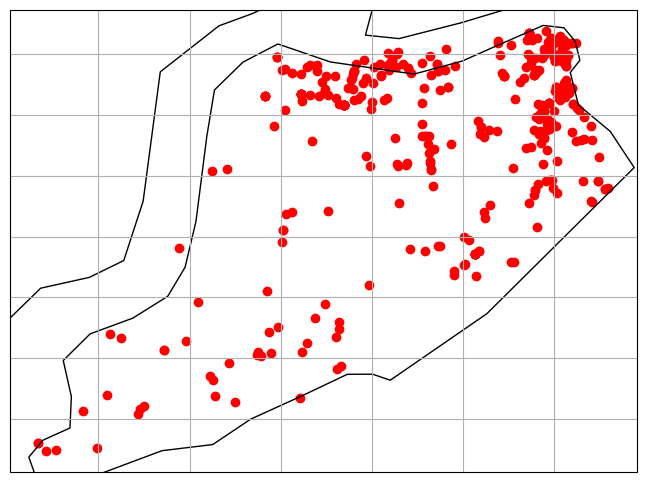

In [312]:
latitude_column = 'Latitude'
longitude_column = 'Longitude'

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection you want to use (e.g., PlateCarree, Mercator, etc.)
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features such as coastlines, rivers, etc.
ax.coastlines()

# Plot points from the DataFrame
ax.scatter(brooklyn_df[longitude_column], brooklyn_df[latitude_column], color='red', marker='o', transform=ccrs.PlateCarree())

# Add gridlines
ax.gridlines()

# Show the plot
plt.show()

In [313]:
df= dividedf(bronx_df)
x_crimes = df[0]
x_public = df[1]

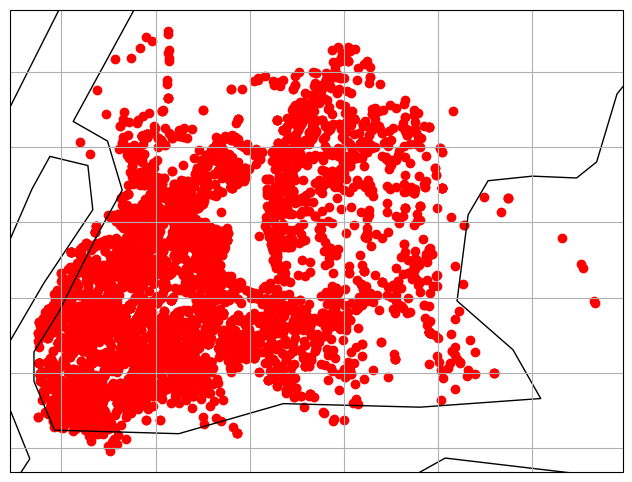

In [314]:
latitude_column = 'Latitude'
longitude_column = 'Longitude'

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection you want to use (e.g., PlateCarree, Mercator, etc.)
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features such as coastlines, rivers, etc.
ax.coastlines()

# Plot points from the DataFrame
ax.scatter(bronx_df[longitude_column], bronx_df[latitude_column], color='red', marker='o', transform=ccrs.PlateCarree())

# Add gridlines
ax.gridlines()

# Show the plot
plt.show()

In [315]:
x_public.head()


,OBJECTID,facname,Public Area,Public Area (supergroup),Latitude,Longitude
0,5348,ST. LUKE'S PARK,GARDENS,PARKS AND PLAZAS,40.805637,-73.915384
1,5349,SOUNDVIEW LIBRARY,PUBLIC LIBRARIES,LIBRARIES,40.818708,-73.862889
2,5350,HORSESHOE PLAYGROUND,RECREATION AND WATERFRONT SITES,PARKS AND PLAZAS,40.824121,-73.897692
3,5351,BAYCHESTER LIBRARY,PUBLIC LIBRARIES,LIBRARIES,40.870278,-73.828611
4,5352,ESTELLA DIGGS PARK,PARKS,PARKS AND PLAZAS,40.828938,-73.906177


In [316]:
df= dividedf(manhattan_df)
m_crimes = df[0]
m_public = df[1]

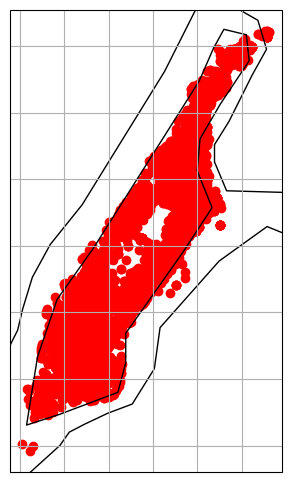

In [317]:
latitude_column = 'Latitude'
longitude_column = 'Longitude'

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection you want to use (e.g., PlateCarree, Mercator, etc.)
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features such as coastlines, rivers, etc.
ax.coastlines()

# Plot points from the DataFrame
ax.scatter(manhattan_df[longitude_column], manhattan_df[latitude_column], color='red', marker='o', transform=ccrs.PlateCarree())

# Add gridlines
ax.gridlines()

# Show the plot
plt.show()

**Finding the Crimes that Occured Near Public Institutions**

- using GeoPandasDataFrame, we are marking the coordinates of each public institution
- then, we are finding the number of crimes that occured within a 1 mile radius of that institution
- we are looking at the results by type of crime which we have narrowed down to robbery, murder/manslaughter, and rape

In [318]:
def creategdf (crimes, public):
#each crime
    x = gpd.GeoDataFrame(
        crimes,
        geometry=gpd.points_from_xy(
            crimes["Latitude"],
            crimes["Longitude"],
        ),
        crs="EPSG:4326",
    )

# each public institution
    y = gpd.GeoDataFrame(
        public,
        geometry=gpd.points_from_xy(
            public["Latitude"],
            public["Longitude"],
        ),
        crs="EPSG:4326",
    )

    # EPSG:3857 converts geometry points to meters
    x = x.to_crs(3857)
    y = y.to_crs(3857)
    return x, y

In [319]:
df = creategdf(r_crimes, r_public)
r_crimes_gdf = df[0]
r_public_gdf = df[1]

In [320]:
df = creategdf(q_crimes, q_public)
q_crimes_gdf = df[0]
q_public_gdf = df[1]

In [321]:
df = creategdf(k_crimes, k_public)
k_crimes_gdf = df[0]
k_public_gdf = df[1]

In [322]:
df = creategdf(x_crimes, x_public)
x_crimes_gdf = df[0]
x_public_gdf = df[1]

In [323]:
df = creategdf(m_crimes, m_public)
m_crimes_gdf = df[0]
m_public_gdf = df[1]

In [324]:
#repeating method to get number of crimes within a mile radius of each random point
#create empty list to hold the number of crimes commited within a 1 mile radius of each location
crimes_per_location = []

#NOTE: radius is in meters
def crimesper (crimes_gdf, public_gdf, radius):
    radius = radius
    for offense in crimes_gdf["Offense"]:
        crimes_per_location = []
        crimes_gdf_each = crimes_gdf[crimes_gdf["Offense"] == offense]

        for i in range(len(public_gdf)):

            # Calculate the distances between all pairs of points
            distances = gpd.GeoSeries(crimes_gdf_each.geometry).distance(public_gdf.geometry.iloc[i])

            # Filter the pairs where the distance is within the radius
            within_radius = distances <= radius

            # Count the number of points within the radius for each point in gdf2
            count_within_radius = within_radius.sum()
            
            crimes_per_location.append(count_within_radius)
        public_gdf[offense] = crimes_per_location

    #creating a column for the sum amount of offenses
    public_gdf["Total Crimes"] = public_gdf[['ROBBERY', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE']].sum(axis=1)

#function for reducing the categories in the Public Areas column
def reducegdf(public_gdf):
    reduced_public_gdf = public_gdf
    reduced_public_gdf["Public Area"] = reduced_public_gdf["Public Area"].replace(
        ['PARKS', 'RECREATION AND WATERFRONT SITES',
            'PRESERVES AND CONSERVATION AREAS', 'CEMETERIES', 'GARDENS'],
            "Parks and Other Outdoor Areas"
    )

    return reduced_public_gdf

print(r_crimes_gdf)

         Complaint ID  Offense   Latitude  Longitude  \
OBJECTID                                               
1           261214832  ROBBERY  40.643566 -74.074001   
2           261233859  ROBBERY  40.635961 -74.161365   
3           261233841  ROBBERY  40.643569 -74.098338   
4           261261343  ROBBERY  40.630408 -74.142977   
5           261347872  ROBBERY  40.630539 -74.076641   
...               ...      ...        ...        ...   
362         279418361  ROBBERY  40.576854 -74.117437   
363         279447847  ROBBERY  40.632740 -74.152082   
364         279472819  ROBBERY  40.614616 -74.084716   
365         279485389  ROBBERY  40.613121 -74.121981   
366         279687754  ROBBERY  40.638005 -74.133351   

                                   geometry  
OBJECTID                                     
1         POINT (4524421.071 -12545498.932)  
2         POINT (4523574.486 -12581036.663)  
3         POINT (4524421.405 -12555379.561)  
4         POINT (4522956.329 -12573540.99

In [325]:
crimesper(r_crimes_gdf, r_public_gdf, 1609)
reduced_r_public_gdf = reducegdf(r_public_gdf)
reduced_r_public_gdf.head(15)



,OBJECTID,Public Area,Latitude,Longitude,geometry,ROBBERY,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,Total Crimes
0,367,Parks and Other Outdoor Areas,40.614533,-74.074185,POINT (4521189.101 -12545573.503),10,1,0,11
1,368,Parks and Other Outdoor Areas,40.510392,-74.230405,POINT (4509596.170 -12609255.973),0,0,0,0
2,369,PUBLIC LIBRARIES,40.595802,-74.063027,POINT (4519103.997 -12541048.240),5,0,0,5
3,370,PUBLIC LIBRARIES,40.590395,-74.101138,POINT (4518502.095 -12556517.429),2,0,0,2
4,371,Parks and Other Outdoor Areas,40.638748,-74.083899,POINT (4523884.728 -12549515.585),24,0,0,24
5,372,Parks and Other Outdoor Areas,40.636564,-74.160471,POINT (4523641.579 -12580672.111),4,1,0,5
6,373,Parks and Other Outdoor Areas,40.576267,-74.203381,POINT (4516929.352 -12598196.087),0,0,0,0
7,374,Parks and Other Outdoor Areas,40.608690,-74.119578,POINT (4520538.708 -12564014.907),10,0,0,10
8,375,Parks and Other Outdoor Areas,40.639297,-74.120934,POINT (4523945.891 -12564566.701),6,1,0,7
9,376,Parks and Other Outdoor Areas,40.526901,-74.163615,POINT (4511433.992 -12581954.507),0,0,0,0


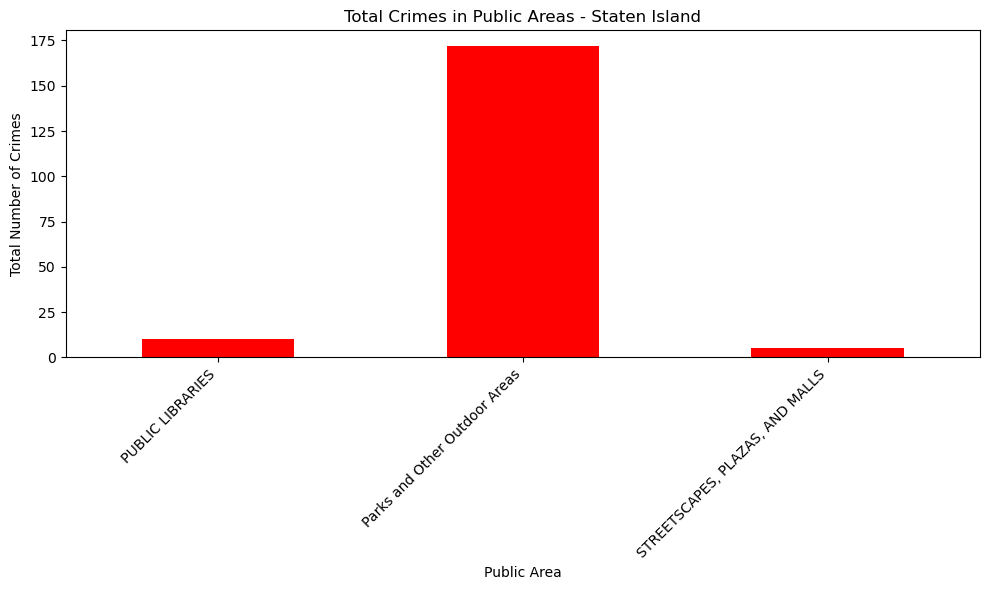

In [326]:

crime_totals = reduced_r_public_gdf.groupby('Public Area')['Total Crimes'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_totals.plot(kind='bar', color='red')
plt.title('Total Crimes in Public Areas - Staten Island')
plt.xlabel('Public Area')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

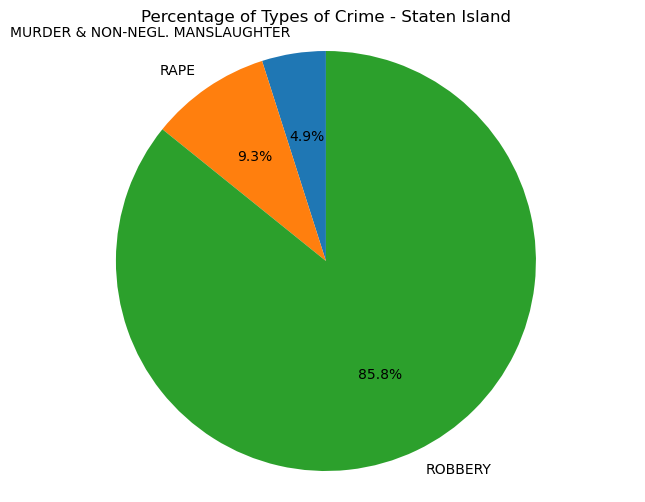

In [327]:
crime_counts = r_crimes_gdf.groupby('Offense').size()

# Calculating the total number of crimes
total_crimes = crime_counts.sum()

# Calculating the percentage of each type of crime
crime_percentage = (crime_counts / total_crimes) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(crime_percentage, labels=crime_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Types of Crime - Staten Island')
plt.axis('equal') 
plt.show()

**Warning: This next part of code may take a while to run**
- may take upwards of 10 mins


In [328]:
crimesper(q_crimes_gdf, q_public_gdf, 1609)
reduced_q_public_gdf = reducegdf(q_public_gdf)
reduced_q_public_gdf.head(15)


,OBJECTID,facname,Public Area,Public Area (supergroup),Latitude,Longitude,geometry,RAPE,ROBBERY,MURDER & NON-NEGL. MANSLAUGHTER,Total Crimes
0,3732,JACKSON HEIGHTS,PUBLIC LIBRARIES,LIBRARIES,40.750202,-73.885069,POINT (4536291.697 -12469290.329),0,147,2,149
1,3733,AUBURNDALE,PUBLIC LIBRARIES,LIBRARIES,40.773751,-73.796349,POINT (4538913.171 -12433803.631),0,2,0,2
2,3734,PARK,"STREETSCAPES, PLAZAS, AND MALLS",PARKS AND PLAZAS,40.728758,-73.879273,POINT (4533904.605 -12466966.372),0,20,0,20
3,3735,POMONOK,PUBLIC LIBRARIES,LIBRARIES,40.733033,-73.809879,POINT (4534380.490 -12439203.250),9,17,0,26
4,3736,CORONA,PUBLIC LIBRARIES,LIBRARIES,40.750890,-73.861980,POINT (4536368.366 -12460037.036),0,164,3,167
5,3737,MIDLAND MALLS,"STREETSCAPES, PLAZAS, AND MALLS",PARKS AND PLAZAS,40.717146,-73.784115,POINT (4532611.951 -12428925.002),0,31,0,31
6,3738,SOUTH JAMAICA,PUBLIC LIBRARIES,LIBRARIES,40.695630,-73.790177,POINT (4530216.827 -12431342.201),0,54,1,55
7,3739,NORELLI-HARGREAVES PLAYGROUND,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.690179,-73.808738,POINT (4529610.044 -12438747.580),0,74,0,74
8,3740,STRIPPOLI SQUARE,"STREETSCAPES, PLAZAS, AND MALLS",PARKS AND PLAZAS,40.757186,-73.907573,POINT (4537069.228 -12478321.900),0,39,2,41
9,3741,GARDEN,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.597016,-73.768579,POINT (4519239.190 -12422735.023),0,11,0,11


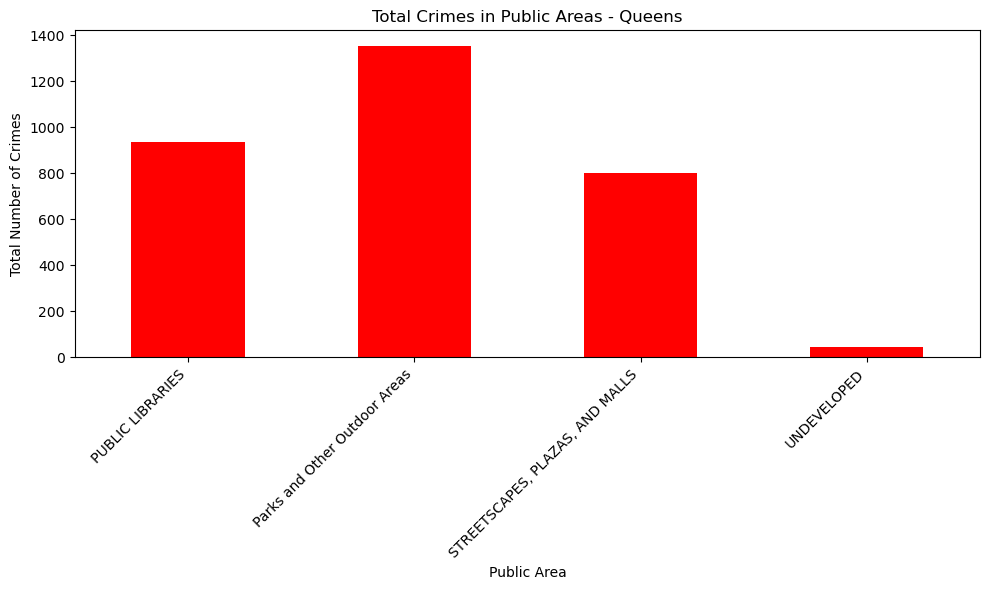

In [329]:
crime_totals = reduced_q_public_gdf.groupby('Public Area')['Total Crimes'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_totals.plot(kind='bar', color='red')
plt.title('Total Crimes in Public Areas - Queens')
plt.xlabel('Public Area')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

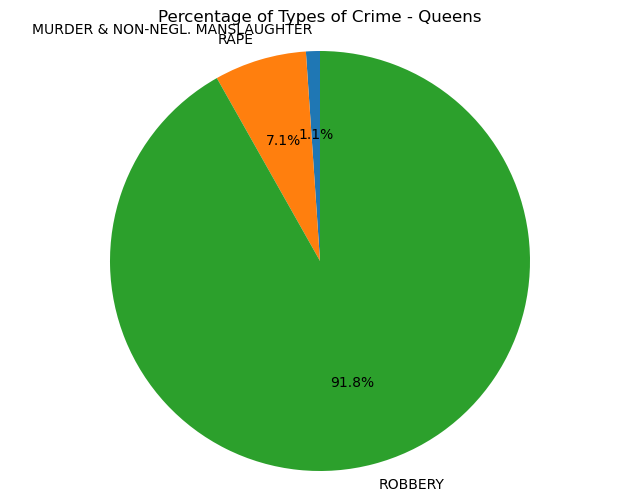

In [330]:
crime_counts = q_crimes_gdf.groupby('Offense').size()

# Calculating the total number of crimes
total_crimes = crime_counts.sum()

# Calculating the percentage of each type of crime
crime_percentage = (crime_counts / total_crimes) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(crime_percentage, labels=crime_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Types of Crime - Queens')
plt.axis('equal') 
plt.show()

In [331]:
crimesper(k_crimes_gdf, k_public_gdf, 1609)
reduced_k_public_gdf = reducegdf(k_public_gdf)
reduced_k_public_gdf.head(15)


,OBJECTID,facname,Public Area,Public Area (supergroup),Latitude,Longitude,geometry,ROBBERY,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,Total Crimes
0,367,DE MATTI PARK,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.614533,-74.074185,POINT (4521189.101 -12545573.503),10,1,0,11
1,368,AESOP PARK,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.510392,-74.230405,POINT (4509596.170 -12609255.973),0,0,0,0
2,369,SOUTH BEACH LIBRARY,PUBLIC LIBRARIES,LIBRARIES,40.595802,-74.063027,POINT (4519103.997 -12541048.240),5,0,0,5
3,370,DONGAN HILLS LIBRARY,PUBLIC LIBRARIES,LIBRARIES,40.590395,-74.101138,POINT (4518502.095 -12556517.429),2,0,0,2
4,371,LIOTTI IKEFUGI PLAYGROUND,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.638748,-74.083899,POINT (4523884.728 -12549515.585),24,0,0,24
5,372,BOBBIE LEWIS JR. PLAYGROUND,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.636564,-74.160471,POINT (4523641.579 -12580672.111),4,1,0,5
6,373,ISLE OF MEADOWS,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.576267,-74.203381,POINT (4516929.352 -12598196.087),0,0,0,0
7,374,CHRISTOPHER J. IGNERI PLAYGROUND,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.608690,-74.119578,POINT (4520538.708 -12564014.907),10,0,0,10
8,375,RICHMOND TERRACE CEMETERY,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.639297,-74.120934,POINT (4523945.891 -12564566.701),6,1,0,7
9,376,GARDEN,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.526901,-74.163615,POINT (4511433.992 -12581954.507),0,0,0,0


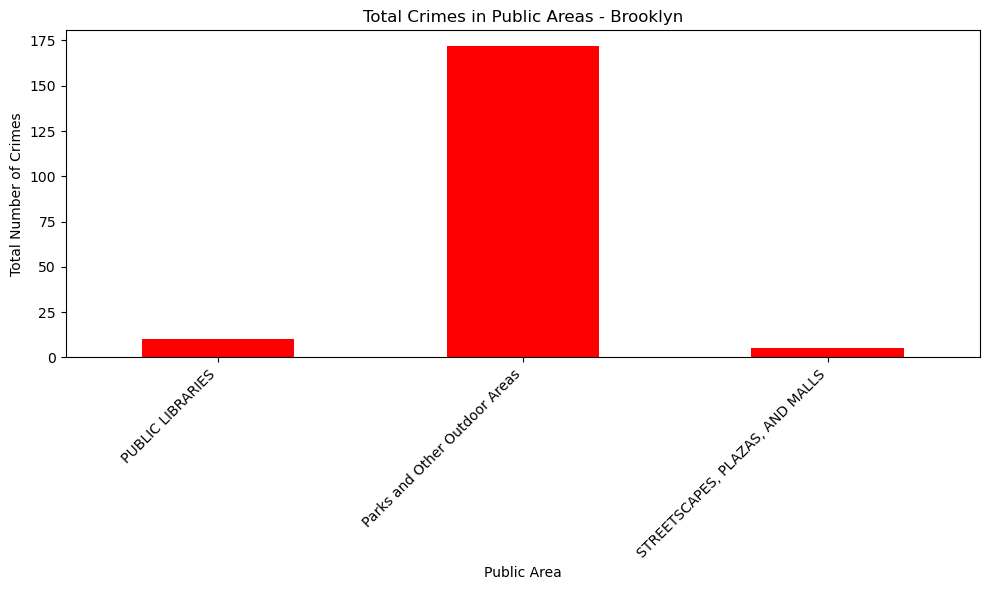

In [332]:
crime_totals = reduced_k_public_gdf.groupby('Public Area')['Total Crimes'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_totals.plot(kind='bar', color='red')
plt.title('Total Crimes in Public Areas - Brooklyn')
plt.xlabel('Public Area')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

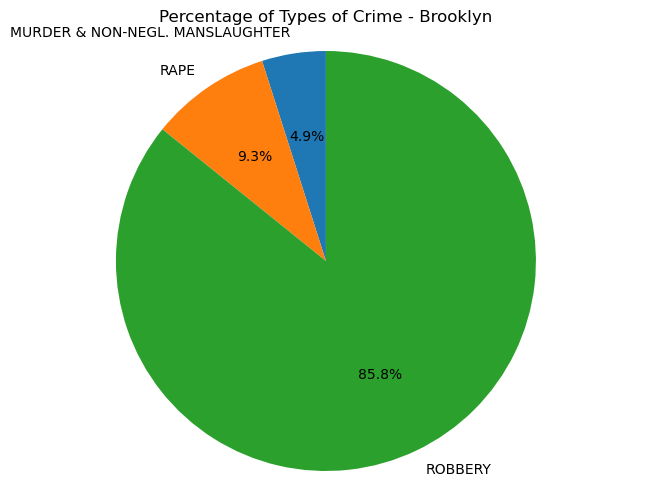

In [333]:
crime_counts = k_crimes_gdf.groupby('Offense').size()

# Calculating the total number of crimes
total_crimes = crime_counts.sum()

# Calculating the percentage of each type of crime
crime_percentage = (crime_counts / total_crimes) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(crime_percentage, labels=crime_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Types of Crime - Brooklyn')
plt.axis('equal') 
plt.show()

In [334]:
crimesper(x_crimes_gdf, x_public_gdf, 1609)
reduced_x_public_gdf = reducegdf(x_public_gdf)
reduced_x_public_gdf.head(15)


,OBJECTID,facname,Public Area,Public Area (supergroup),Latitude,Longitude,geometry,RAPE,ROBBERY,MURDER & NON-NEGL. MANSLAUGHTER,Total Crimes
0,5348,ST. LUKE'S PARK,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.805637,-73.915384,POINT (4542462.771 -12481459.815),0,212,5,217
1,5349,SOUNDVIEW LIBRARY,PUBLIC LIBRARIES,LIBRARIES,40.818708,-73.862889,POINT (4543917.734 -12460401.056),0,70,0,70
2,5350,HORSESHOE PLAYGROUND,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.824121,-73.897692,POINT (4544520.386 -12474354.807),14,196,3,213
3,5351,BAYCHESTER LIBRARY,PUBLIC LIBRARIES,LIBRARIES,40.870278,-73.828611,POINT (4549658.510 -12446685.940),0,26,0,26
4,5352,ESTELLA DIGGS PARK,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.828938,-73.906177,POINT (4545056.609 -12477761.571),0,210,8,218
5,5353,MOSHOLU LIBRARY,PUBLIC LIBRARIES,LIBRARIES,40.874383,-73.878394,POINT (4550115.474 -12466613.843),32,70,4,106
6,5354,AQUEDUCT WALK,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.865127,-73.902162,POINT (4549085.134 -12476149.225),16,222,3,241
7,5355,CROTONA PARK,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.840033,-73.895347,POINT (4546291.689 -12473413.733),0,125,4,129
8,5356,WAKEFIELD LIBRARY,PUBLIC LIBRARIES,LIBRARIES,40.891098,-73.859523,POINT (4551976.165 -12459052.920),0,85,3,88
9,5357,BRYAN PARK PLAZA,"STREETSCAPES, PLAZAS, AND MALLS",PARKS AND PLAZAS,40.862172,-73.894218,POINT (4548756.198 -12472960.694),0,257,4,261


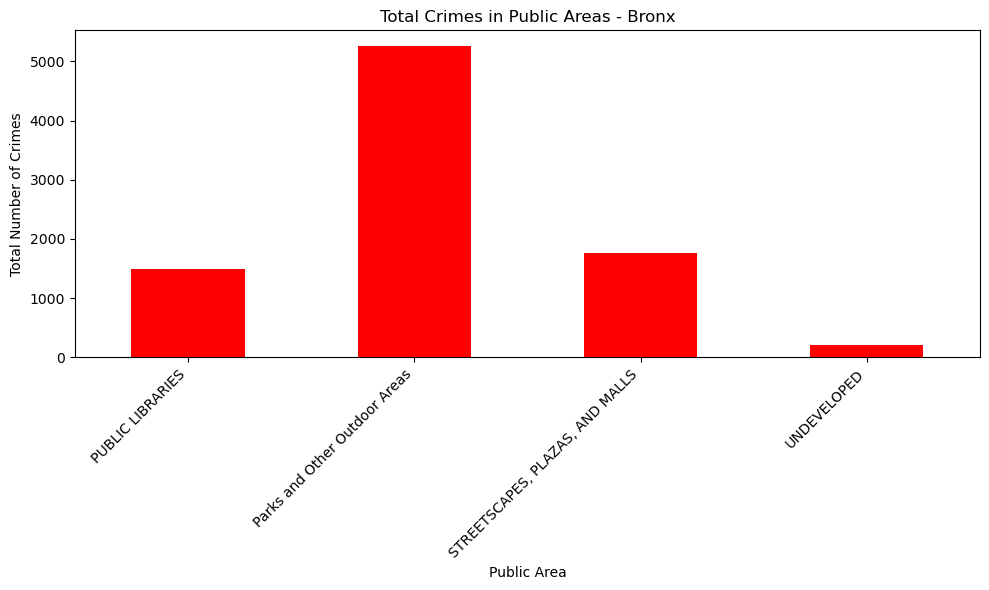

In [335]:
crime_totals = reduced_x_public_gdf.groupby('Public Area')['Total Crimes'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_totals.plot(kind='bar', color='red')
plt.title('Total Crimes in Public Areas - Bronx')
plt.xlabel('Public Area')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

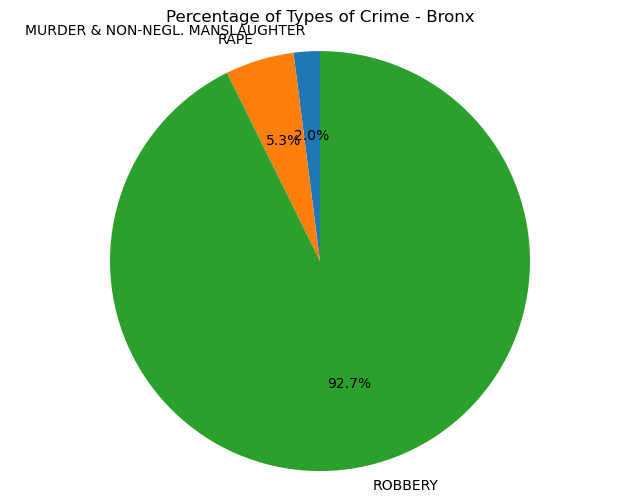

In [336]:
crime_counts = x_crimes_gdf.groupby('Offense').size()

# Calculating the total number of crimes
total_crimes = crime_counts.sum()

# Calculating the percentage of each type of crime
crime_percentage = (crime_counts / total_crimes) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(crime_percentage, labels=crime_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Types of Crime - Bronx')
plt.axis('equal') 
plt.show()

In [337]:
crimesper(m_crimes_gdf, m_public_gdf, 1609)
reduced_m_public_gdf = reducegdf(m_public_gdf)
reduced_m_public_gdf.head(15)


,OBJECTID,facname,Public Area,Public Area (supergroup),Latitude,Longitude,geometry,ROBBERY,RAPE,MURDER & NON-NEGL. MANSLAUGHTER,Total Crimes
0,4106,BRADHURST AVE GARDEN,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.827666,-73.939326,POINT (4544914.964 -12491086.537),175,0,8,183
1,4107,DAMROSCH PARK,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.772213,-73.984994,POINT (4538741.974 -12509487.607),117,8,2,127
2,4108,CHELSEA PARK,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.749942,-74.000728,POINT (4536262.754 -12515839.336),99,8,1,108
3,4109,METROPOLITAN TOWER,PRIVATELY OWNED PUBLIC SPACE,PARKS AND PLAZAS,40.764801,-73.979238,POINT (4537916.851 -12507165.666),77,0,0,77
4,4110,BEL CANTO,PRIVATELY OWNED PUBLIC SPACE,PARKS AND PLAZAS,40.775278,-73.982638,POINT (4539083.176 -12508536.879),72,8,0,80
5,4111,"733 PARK AVENUE, NEW YORK, NY 10021",PRIVATELY OWNED PUBLIC SPACE,PARKS AND PLAZAS,40.770083,-73.964118,POINT (4538504.927 -12501069.584),89,12,0,101
6,4112,BLEECKER PLAYGROUND,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.736352,-74.005565,POINT (4534749.991 -12517793.195),95,8,0,103
7,4113,MARGRICHANTE GARDEN,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.813752,-73.943443,POINT (4543366.078 -12492743.219),221,22,8,251
8,4114,EAST PROMENADE,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.765531,-73.945446,POINT (4537998.153 -12493549.413),3,0,0,3
9,4115,COLONELS ROW,Parks and Other Outdoor Areas,PARKS AND PLAZAS,40.690715,-74.018823,POINT (4529669.674 -12523151.468),0,0,0,0


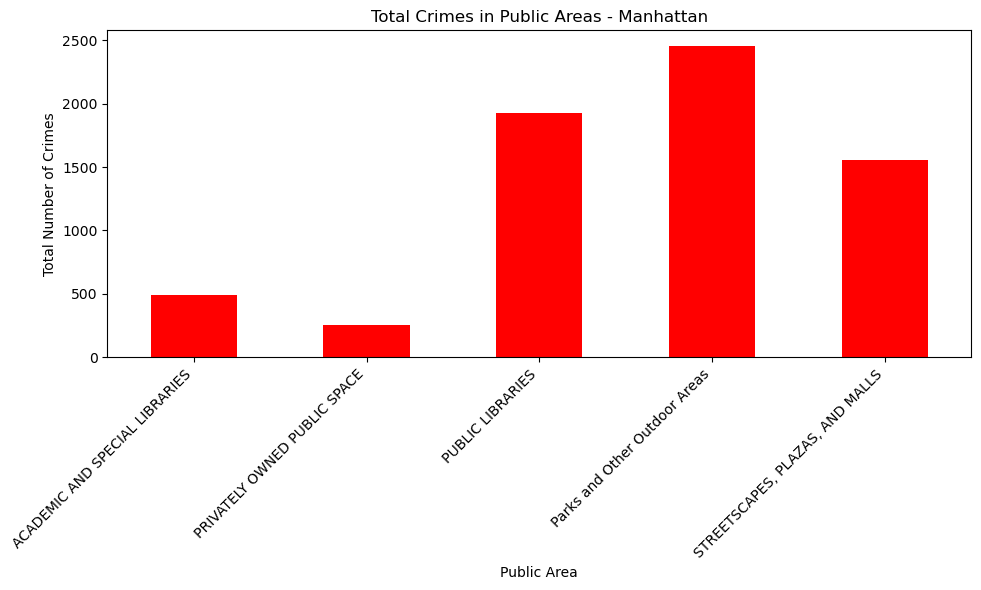

In [338]:
crime_totals = reduced_m_public_gdf.groupby('Public Area')['Total Crimes'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_totals.plot(kind='bar', color='red')
plt.title('Total Crimes in Public Areas - Manhattan')
plt.xlabel('Public Area')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

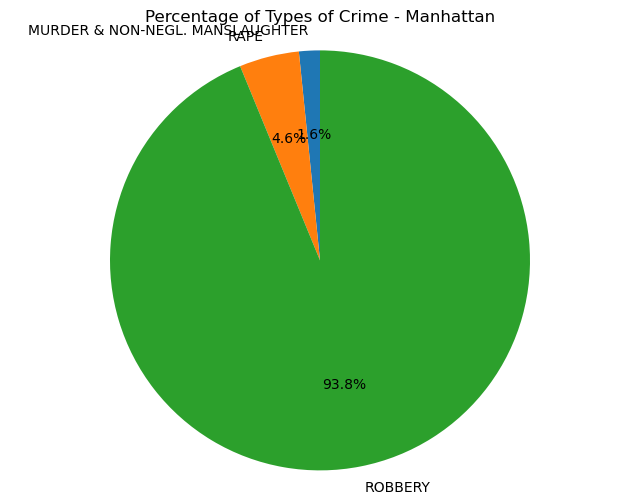

In [339]:
crime_counts = m_crimes_gdf.groupby('Offense').size()

# Calculating the total number of crimes
total_crimes = crime_counts.sum()

# Calculating the percentage of each type of crime
crime_percentage = (crime_counts / total_crimes) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(crime_percentage, labels=crime_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Types of Crime - Manhattan')
plt.axis('equal') 
plt.show()

In [340]:
#formula for getting the summary stats of each borough
def gdf_summary_stats(reduced_gdf):
    summary_stats = reduced_gdf.groupby("Public Area")[['ROBBERY', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'Total Crimes']].describe()
    return summary_stats

In [341]:
gdf_summary_stats(reduced_r_public_gdf)["ROBBERY"]


,count,mean,std,min,25%,50%,75%,max
Public Area,,,,,,,,
PUBLIC LIBRARIES,4.0,2.500000,1.732051,1.0,1.75,2.0,2.75,5.0
Parks and Other Outdoor Areas,19.0,7.947368,10.746957,0.0,0.50,5.0,9.50,41.0
"STREETSCAPES, PLAZAS, AND MALLS",1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0


In [342]:
gdf_summary_stats(reduced_q_public_gdf)["Total Crimes"]

,count,mean,std,min,25%,50%,75%,max
Public Area,,,,,,,,
PUBLIC LIBRARIES,20.0,46.700000,54.463991,2.0,12.75,17.0,56.25,167.0
Parks and Other Outdoor Areas,35.0,38.657143,44.686452,0.0,7.50,17.0,59.00,163.0
"STREETSCAPES, PLAZAS, AND MALLS",25.0,32.120000,41.553500,0.0,8.00,16.0,41.00,166.0
UNDEVELOPED,4.0,11.750000,6.849574,2.0,10.25,13.5,15.00,18.0


In [343]:
gdf_summary_stats(reduced_k_public_gdf)

ROBBERY                                       \
                                  count      mean        std  min   25%  50%   
Public Area                                                                    
PUBLIC LIBRARIES                    4.0  2.500000   1.732051  1.0  1.75  2.0   
Parks and Other Outdoor Areas      19.0  7.947368  10.746957  0.0  0.50  5.0   
STREETSCAPES, PLAZAS, AND MALLS     1.0  5.000000        NaN  5.0  5.00  5.0   

                                            MURDER & NON-NEGL. MANSLAUGHTER  \
                                  75%   max                           count   
Public Area                                                                   
PUBLIC LIBRARIES                 2.75   5.0                             4.0   
Parks and Other Outdoor Areas    9.50  41.0                            19.0   
STREETSCAPES, PLAZAS, AND MALLS  5.00   5.0                             1.0   

                                           ... RAPE       Total Crimes  \
                                     mean  ...  75%   max        count   
Public Area                                ...                           
PUBLIC LIBRARIES                 0.000000  ...  0.0   0.0          4.0   
Parks and Other Outdoor Areas    0.315789  ...  0.0  15.0         19.0   
STREETSCAPES, PLAZAS, AND MALLS  0.000000  ...  0.0   0.0          1.0   

                                                                             \
                                     mean        std  min   25%  50%    75%   
Public Area                                                                   
PUBLIC LIBRARIES                 2.500000   1.732051  1.0  1.75  2.0   2.75   
Parks and Other Outdoor Areas    9.052632  13.459708  0.0  0.50  5.0  10.00   
STREETSCAPES, PLAZAS, AND MALLS  5.000000        NaN  5.0  5.00  5.0   5.00   

                                       
                                  max  
Public Area                            
PUBLIC LIBRARIES                  5.0  
Parks and Other Outdoor Areas    56.0  
STREETSCAPES, PLAZAS, AND MALLS   5.0  

[3 rows x 32 columns]

In [344]:
gdf_summary_stats(reduced_x_public_gdf)

ROBBERY                                 \
                                  count        mean         std    min   
Public Area                                                              
PUBLIC LIBRARIES                   11.0  117.818182  101.117573    2.0   
Parks and Other Outdoor Areas      30.0  164.500000   76.569891    1.0   
STREETSCAPES, PLAZAS, AND MALLS    12.0  134.083333   95.234121   11.0   
UNDEVELOPED                         1.0  208.000000         NaN  208.0   

                                                              \
                                    25%    50%    75%    max   
Public Area                                                    
PUBLIC LIBRARIES                  48.00   85.0  167.5  333.0   
Parks and Other Outdoor Areas    121.25  193.0  212.0  302.0   
STREETSCAPES, PLAZAS, AND MALLS   32.50  145.0  215.5  257.0   
UNDEVELOPED                      208.00  208.0  208.0  208.0   

                                MURDER & NON-NEGL. MANSLAUGHTER            \
                                                          count      mean   
Public Area                                                                 
PUBLIC LIBRARIES                                           11.0  2.545455   
Parks and Other Outdoor Areas                              30.0  4.066667   
STREETSCAPES, PLAZAS, AND MALLS                            12.0  3.416667   
UNDEVELOPED                                                 1.0  9.000000   

                                 ...  RAPE       Total Crimes              \
                                 ...   75%   max        count        mean   
Public Area                      ...                                        
PUBLIC LIBRARIES                 ...  34.0  44.0         11.0  135.090909   
Parks and Other Outdoor Areas    ...  10.5  36.0         30.0  175.366667   
STREETSCAPES, PLAZAS, AND MALLS  ...  19.5  36.0         12.0  147.000000   
UNDEVELOPED                      ...   0.0   0.0          1.0  217.000000   

                                                                           \
                                        std    min     25%    50%     75%   
Public Area                                                                 
PUBLIC LIBRARIES                 113.269991    2.0   48.00  106.0  199.50   
Parks and Other Outdoor Areas     82.582240    1.0  126.00  205.5  221.00   
STREETSCAPES, PLAZAS, AND MALLS   99.955445   11.0   33.25  181.0  223.75   
UNDEVELOPED                             NaN  217.0  217.00  217.0  217.00   

                                        
                                   max  
Public Area                             
PUBLIC LIBRARIES                 374.0  
Parks and Other Outdoor Areas    331.0  
STREETSCAPES, PLAZAS, AND MALLS  265.0  
UNDEVELOPED                      217.0  

[4 rows x 32 columns]

In [345]:
gdf_summary_stats(reduced_m_public_gdf)

ROBBERY                                 \
                                  count        mean         std    min   
Public Area                                                              
ACADEMIC AND SPECIAL LIBRARIES      2.0  238.000000  132.936075  144.0   
PRIVATELY OWNED PUBLIC SPACE        3.0   79.333333    8.736895   72.0   
PUBLIC LIBRARIES                   14.0  130.714286   61.047810    8.0   
Parks and Other Outdoor Areas      24.0   95.666667   86.267363    0.0   
STREETSCAPES, PLAZAS, AND MALLS    14.0  103.928571   87.661468   19.0   

                                                               \
                                    25%    50%     75%    max   
Public Area                                                     
ACADEMIC AND SPECIAL LIBRARIES   191.00  238.0  285.00  332.0   
PRIVATELY OWNED PUBLIC SPACE      74.50   77.0   83.00   89.0   
PUBLIC LIBRARIES                  86.25  127.5  170.50  236.0   
Parks and Other Outdoor Areas     23.75   79.5  162.75  298.0   
STREETSCAPES, PLAZAS, AND MALLS   59.00   74.0  126.75  357.0   

                                MURDER & NON-NEGL. MANSLAUGHTER            \
                                                          count      mean   
Public Area                                                                 
ACADEMIC AND SPECIAL LIBRARIES                              2.0  1.000000   
PRIVATELY OWNED PUBLIC SPACE                                3.0  0.000000   
PUBLIC LIBRARIES                                           14.0  2.428571   
Parks and Other Outdoor Areas                              24.0  1.916667   
STREETSCAPES, PLAZAS, AND MALLS                            14.0  1.571429   

                                 ...   RAPE       Total Crimes              \
                                 ...    75%   max        count        mean   
Public Area                      ...                                         
ACADEMIC AND SPECIAL LIBRARIES   ...   9.75  13.0          2.0  245.500000   
PRIVATELY OWNED PUBLIC SPACE     ...  10.00  12.0          3.0   86.000000   
PUBLIC LIBRARIES                 ...   8.00  10.0         14.0  137.571429   
Parks and Other Outdoor Areas    ...   8.00  22.0         24.0  102.250000   
STREETSCAPES, PLAZAS, AND MALLS  ...   8.00  25.0         14.0  111.142857   

                                                                           \
                                        std    min     25%    50%     75%   
Public Area                                                                 
ACADEMIC AND SPECIAL LIBRARIES   142.128463  145.0  195.25  245.5  295.75   
PRIVATELY OWNED PUBLIC SPACE      13.076697   77.0   78.50   80.0   90.50   
PUBLIC LIBRARIES                  65.041660    8.0   93.25  131.0  180.00   
Parks and Other Outdoor Areas     93.303735    0.0   23.75   80.5  169.75   
STREETSCAPES, PLAZAS, AND MALLS   91.089860   19.0   60.00   79.5  145.75   

                                        
                                   max  
Public Area                             
ACADEMIC AND SPECIAL LIBRARIES   346.0  
PRIVATELY OWNED PUBLIC SPACE     101.0  
PUBLIC LIBRARIES                 250.0  
Parks and Other Outdoor Areas    317.0  
STREETSCAPES, PLAZAS, AND MALLS  358.0  

[5 rows x 32 columns]

In [346]:
#exporting to csv so the next file of code is possible
path = "C:/Users/54qb3/Documents/Project-1/output_data/"
pd.DataFrame(reduced_r_public_gdf).to_csv(f"{path}reduced_r_public_gdf.csv")
pd.DataFrame(reduced_q_public_gdf).to_csv(f"{path}reduced_q_public_gdf.csv")
pd.DataFrame(reduced_k_public_gdf).to_csv(f"{path}reduced_k_public_gdf.csv")
pd.DataFrame(reduced_x_public_gdf).to_csv(f"{path}reduced_x_public_gdf.csv")
pd.DataFrame(reduced_m_public_gdf).to_csv(f"{path}reduced_m_public_gdf.csv")

OSError: Cannot save file into a non-existent directory: 'C:\Users\54qb3\Documents\Project-1\output_data'

In [ ]:
#exporting to csv so the next file of code is possible
pd.DataFrame(r_crimes_gdf).to_csv(f"{path}r_crimes_gdf.csv")
pd.DataFrame(q_crimes_gdf).to_csv(f"{path}q_crimes_gdf.csv")
pd.DataFrame(k_crimes_gdf).to_csv(f"{path}k_crimes_gdf.csv")
pd.DataFrame(x_crimes_gdf).to_csv(f"{path}x_crimes_gdf.csv")
pd.DataFrame(m_crimes_gdf).to_csv(f"{path}m_crimes_gdf.csv")